In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel Data

df = pd.read_excel(r"F:\Downloads\salesdata.xlsx")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:

print("Shape of data:", df.shape)

Shape of data: (9648, 13)


In [7]:
print("\nData types:\n", df.dtypes)


Data types:
 Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Date              9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [9]:
print("\nNull values:\n", df.isnull().sum())


Null values:
 Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [25]:
# Drop rows with invalid/missing dates
df.dropna(subset=['Date'], inplace=True)
print("Shape of data:", df.shape)



Shape of data: (9648, 13)


In [31]:
# Fill or replace 0 values
df['Units Sold'].replace(0, np.nan, inplace=True)
df['Units Sold'].fillna(df['Units Sold'].median(), inplace=True)

,Retailer,Retailer ID,Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store


In [35]:
df.loc[df['Total Sales'] == 0, 'Total Sales'] = np.nan
df['Total Sales'] = df['Total Sales'].fillna(df['Total Sales'].median())

In [39]:
df.loc[df['Operating Profit'] == 0, 'Operating Profit'] = np.nan
df['Operating Profit'] = df['Operating Profit'].fillna(df['Operating Profit'].median())

In [41]:
# Recalculate derived columns if needed
df['Price per Unit'] = df['Total Sales'] / df['Units Sold']

In [45]:
print(df.columns.tolist())

['Retailer', 'Retailer ID', 'Date', 'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method']


In [52]:
# EDA — DESCRIPTIVE STATS
print("\nSummary:\n", df.describe())


Summary:
         Retailer ID                           Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296      221.807395   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       39.000000   
50%    1.185732e+06            2021-06-04 00:00:00       56.000000   
75%    1.185732e+06            2021-09-16 00:00:00      450.000000   
max    1.197831e+06            2021-12-31 00:00:00     1100.000000   
std    2.636038e+04                            NaN      238.056362   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    257.003006   93277.409722      34427.058343          0.422991  
min       6.000000     160.000000         75.200000          0.100000  
25%     106.000000    4263.000000       1925.595000          0.350000 

In [54]:
# 🔢 VALUE COUNTS
print("\nSales Method Distribution:\n", df['Sales Method'].value_counts())
print("\nTop Products:\n", df['Product'].value_counts().head())
print("\nTop States:\n", df['State'].value_counts().head())


Sales Method Distribution:
 Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

Top Products:
 Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Name: count, dtype: int64

Top States:
 State
California     432
Texas          432
New York       360
Florida        360
Mississippi    216
Name: count, dtype: int64


In [64]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.day_name()

# Check result
print(df[['Date', 'Year', 'Month', 'Weekday']].head())

        Date  Year    Month    Weekday
0 2020-01-01  2020  January  Wednesday
1 2020-01-02  2020  January   Thursday
2 2020-01-03  2020  January     Friday
3 2020-01-04  2020  January   Saturday
4 2020-01-05  2020  January     Sunday


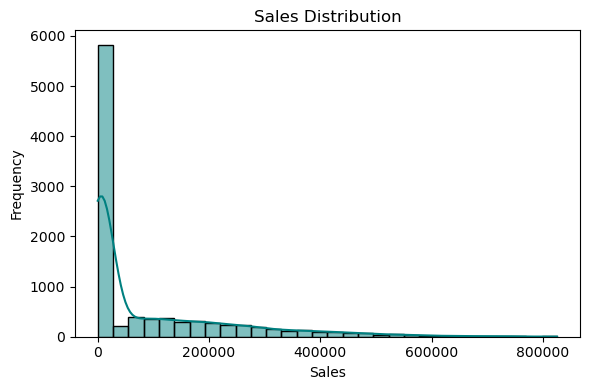

In [60]:
# 2. Histogram - Sales
plt.figure(figsize=(6, 4))
sns.histplot(df['Total Sales'], bins=30, kde=True, color='teal')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [66]:
# Total sales per year
yearly_sales = df.groupby('Year')['Total Sales'].sum()
print("\nYearly Sales:\n", yearly_sales)


Yearly Sales:
 Year
2020    182080675.0
2021    717859774.0
Name: Total Sales, dtype: float64


In [68]:
# Total sales per product
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("\nSales per Product:\n", product_sales.head())


Sales per Product:
 Product
Men's Street Footwear      208826244.0
Women's Apparel            179038860.0
Men's Athletic Footwear    153673680.0
Women's Street Footwear    128002813.0
Men's Apparel              123728632.0
Name: Total Sales, dtype: float64


In [70]:
# Sales per state
state_sales = df.groupby('State')['Total Sales'].sum().sort_values(ascending=False)
print("\nSales per State:\n", state_sales.head())


Sales per State:
 State
New York          64229039.0
California        60174133.0
Florida           59283714.0
Texas             46359746.0
South Carolina    29285637.0
Name: Total Sales, dtype: float64


C:\Users\HELLO\AppData\Local\Temp\ipykernel_6120\2918727344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='viridis')


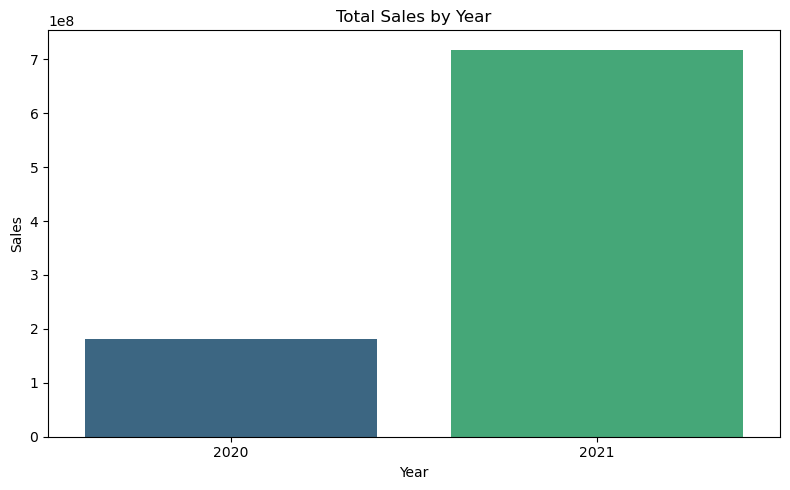

In [72]:
# Visualization: Total Sales by Year
plt.figure(figsize=(8,5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='viridis')
plt.title('Total Sales by Year')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

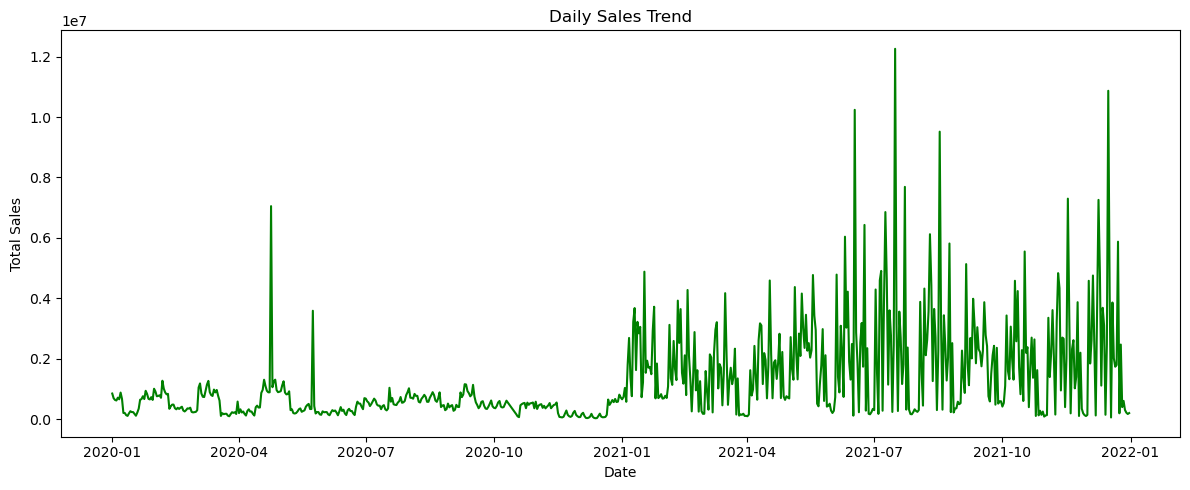

In [78]:
# 1. 📈 Line Plot – Sales Trend Over Time
daily_sales = df.groupby('Date')['Total Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['Total Sales'], color='green')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

C:\Users\HELLO\AppData\Local\Temp\ipykernel_6120\1251797218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='magma')


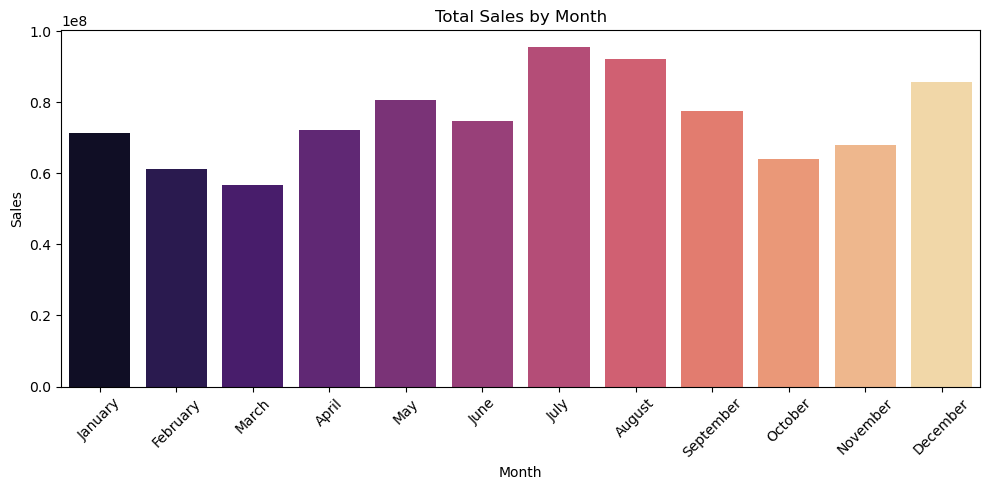

In [74]:
#  Visualization: Sales by Month
monthly_sales = df.groupby('Month')['Total Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Total Sales by Month')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

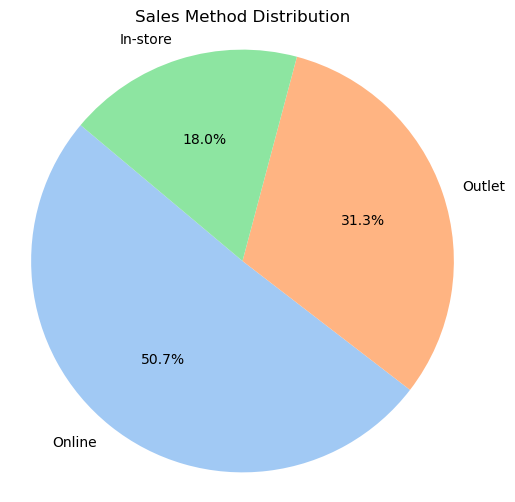

In [80]:
sales_method_counts = df['Sales Method'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sales_method_counts, labels=sales_method_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Sales Method Distribution")
plt.axis('equal')
plt.show()


C:\Users\HELLO\AppData\Local\Temp\ipykernel_6120\2749779570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_profit.index[:10], x=product_profit.values[:10], palette='coolwarm')


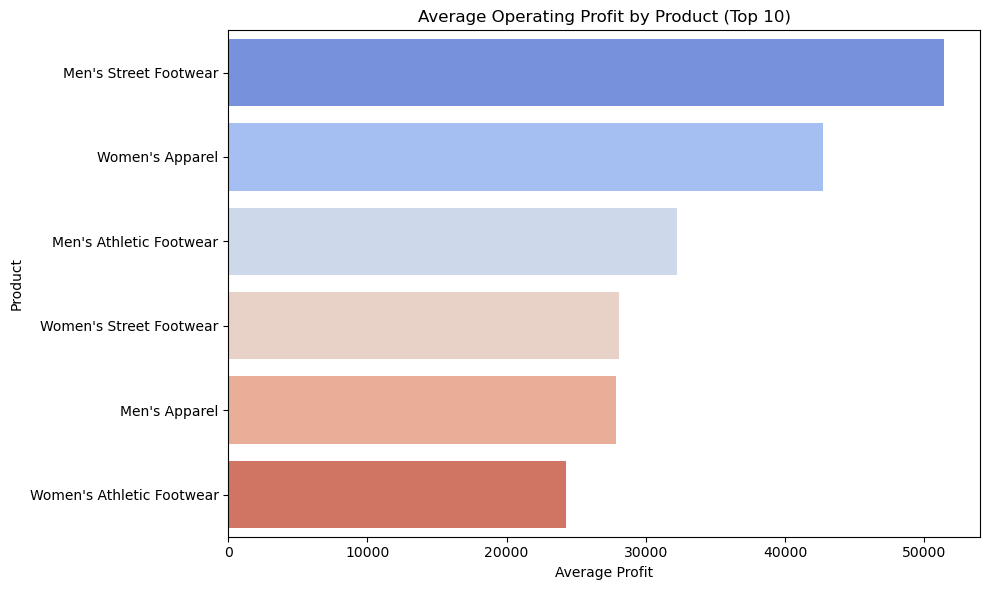

In [76]:
#  Profit Analysis by Product
product_profit = df.groupby('Product')['Operating Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=product_profit.index[:10], x=product_profit.values[:10], palette='coolwarm')
plt.title('Average Operating Profit by Product (Top 10)')
plt.xlabel('Average Profit')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

C:\Users\HELLO\AppData\Local\Temp\ipykernel_6120\387157125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price per Unit', data=df, palette='Set2')


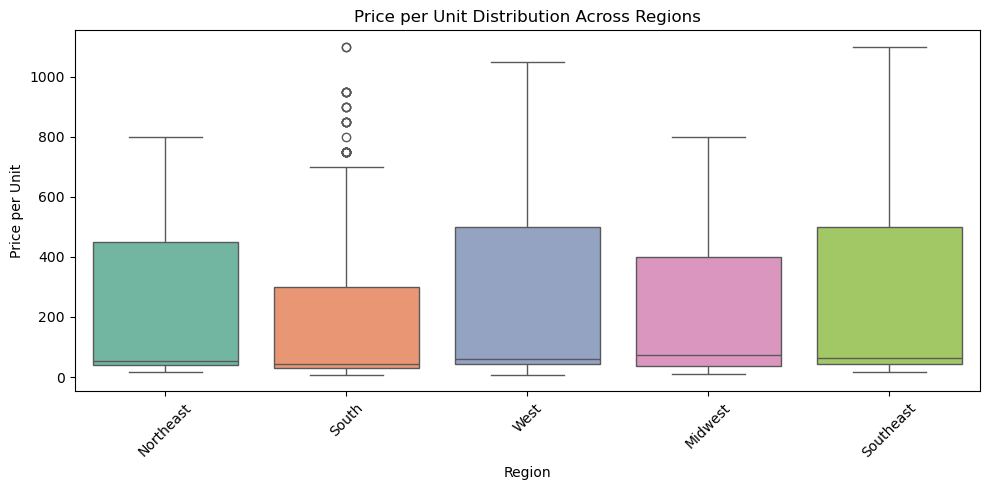

In [82]:
# Box Plot – Price Distribution per Region
plt.figure(figsize=(10,5))
sns.boxplot(x='Region', y='Price per Unit', data=df, palette='Set2')
plt.title("Price per Unit Distribution Across Regions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


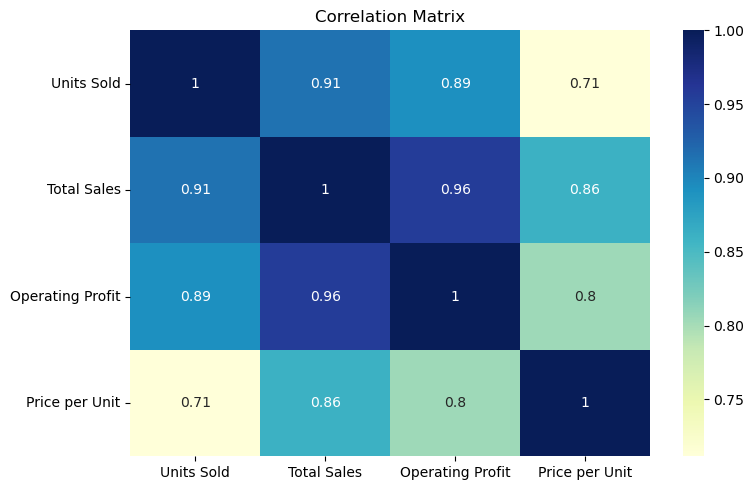

In [84]:
 # 4.Heatmap – Correlation Matrix
plt.figure(figsize=(8,5))
corr_matrix = df[['Units Sold', 'Total Sales', 'Operating Profit', 'Price per Unit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


C:\Users\HELLO\AppData\Local\Temp\ipykernel_6120\3428666442.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product', data=df[df['Product'].isin(top_products.index)], order=top_products.index, palette='flare')


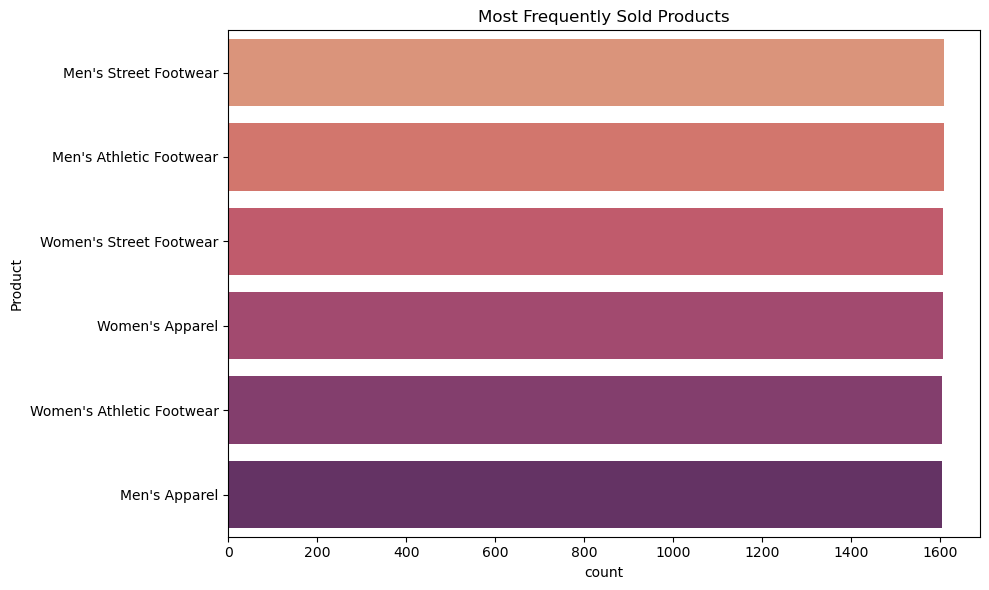

In [86]:
#  5.Count Plot – Top 10 Products
top_products = df['Product'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.countplot(y='Product', data=df[df['Product'].isin(top_products.index)], order=top_products.index, palette='flare')
plt.title("Most Frequently Sold Products")
plt.tight_layout()
plt.show()


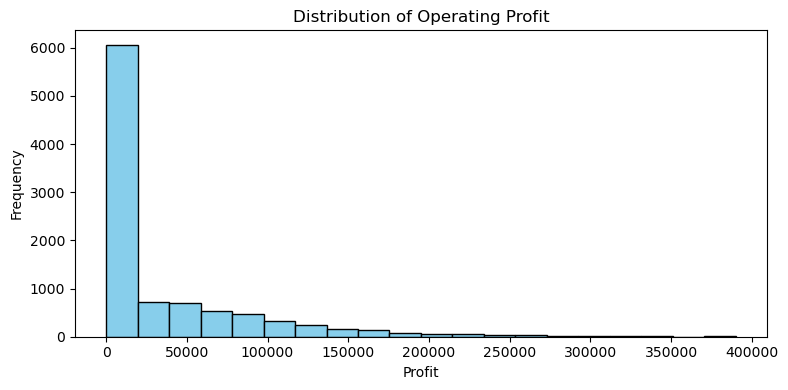

In [88]:
 # Histogram – Distribution of Operating Profit

plt.figure(figsize=(8,4))
plt.hist(df['Operating Profit'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Operating Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()